In [1]:
import numpy as np
import pandas as pd, numpy as np, io, re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [5]:
df = pd.read_csv("/Users/hatemelgenedy/Desktop/AI and Data Science Microsoft course/Class/Datasets from class/sales.csv")


df.head(5)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [6]:
df.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'] , errors = 'coerce')

print(df.head())

   Area Code        State Market   Market Size  Profit  Margin  Sales   COGS  \
0        203  Connecticut   East  Small Market   107.0   176.0  292.0  116.0   
1        203  Connecticut   East  Small Market    75.0   135.0  225.0   90.0   
2        203  Connecticut   East  Small Market   122.0   195.0  325.0  130.0   
3        203  Connecticut   East  Small Market   105.0   174.0  289.0  115.0   
4        203  Connecticut   East  Small Market   104.0   135.0  223.0   90.0   

   Total Expenses  Marketing  Inventory  Budget Profit  Budget COGS  \
0            69.0       38.0      962.0          110.0        110.0   
1            60.0       29.0     1148.0           90.0         80.0   
2            73.0       42.0     1134.0          130.0        110.0   
3            69.0       37.0     1166.0          110.0        100.0   
4            56.0       29.0     1148.0           90.0         80.0   

   Budget Margin  Budget Sales  ProductId       Date Product Type    Product  \
0          1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area Code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market Size     4248 non-null   object        
 4   Profit          4248 non-null   float64       
 5   Margin          4248 non-null   float64       
 6   Sales           4248 non-null   float64       
 7   COGS            4248 non-null   float64       
 8   Total Expenses  4248 non-null   float64       
 9   Marketing       4248 non-null   float64       
 10  Inventory       4248 non-null   float64       
 11  Budget Profit   4248 non-null   float64       
 12  Budget COGS     4248 non-null   float64       
 13  Budget Margin   4248 non-null   float64       
 14  Budget Sales    4248 non-null   float64       
 15  Prod

In [9]:
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006,2010-12-16 00:00:00
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000,2010-01-01 00:00:00
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000,2010-06-23 12:00:00
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000,2010-12-16 12:00:00
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000,2011-06-08 12:00:00
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000,2011-12-01 00:00:00
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072,NaN


In [10]:
duplicates = df . duplicated().sum()
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 0


In [11]:
for col in df . select_dtypes(include = ['object']).columns :
  df[col] = df[col] .  str.lower().str.strip()

In [12]:
categorical_summary = {
    col: {
        "unique_values": df[col].unique(),
        "unique_count": df[col].nunique(),
        "frequencies": df[col].value_counts().to_dict()
    }
    for col in df.select_dtypes(include=['object']).columns
}

# Print results cleanly
for col, details in categorical_summary.items():
    print(f"\n🔹 {col}")
    print("Unique values:", details["unique_values"])
    print("Unique count:", details["unique_count"])
    print("Frequencies:", details["frequencies"])


🔹 State
Unique values: ['connecticut' 'washington' 'california' 'texas' 'new york' 'ohio'
 'illinois' 'louisiana' 'florida' 'wisconsin' 'colorado' 'missouri' 'iowa'
 'massachusetts' 'oklahoma' 'utah' 'oregon' 'new mexico' 'new hampshire'
 'nevada']
Unique count: 20
Frequencies: {'california': 288, 'utah': 288, 'colorado': 264, 'oregon': 264, 'nevada': 264, 'washington': 240, 'missouri': 216, 'iowa': 216, 'wisconsin': 216, 'ohio': 216, 'florida': 216, 'illinois': 216, 'new york': 192, 'connecticut': 168, 'texas': 168, 'louisiana': 168, 'new mexico': 168, 'oklahoma': 168, 'new hampshire': 168, 'massachusetts': 144}

🔹 Market
Unique values: ['east' 'west' 'south' 'central']
Unique count: 4
Frequencies: {'west': 1344, 'central': 1344, 'east': 888, 'south': 672}

🔹 Market Size
Unique values: ['small market' 'major market']
Unique count: 2
Frequencies: {'small market': 2544, 'major market': 1704}

🔹 Product Type
Unique values: ['coffee' 'tea' 'espresso' 'herbal tea']
Unique count: 4
Frequen

Top 5 states with highest total sales : 

State
california    96892.0
new york      70852.0
illinois      69883.0
nevada        60159.0
iowa          54750.0
Name: Sales, dtype: float64


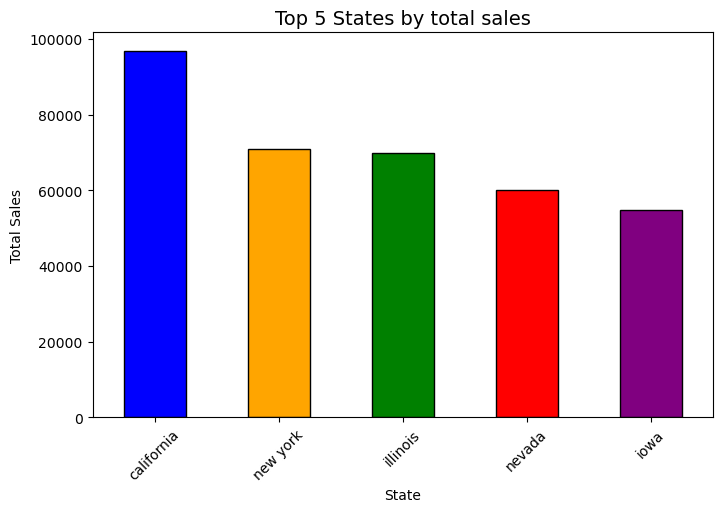

In [28]:
top_5_states_sales = df.groupby("State")["Sales"].sum().sort_values(ascending = False).head(5)
colors = ["blue", "orange", "green", "red", "purple"]
print("Top 5 states with highest total sales : \n")
print(top_5_states_sales)
plt.figure(figsize = (8,5))
top_5_states_sales.plot(kind = "bar", color = colors, edgecolor = "black")  # Fixed typo: top_5_sates_sales -> top_5_states_sales
plt.title("Top 5 States by total sales", fontsize = 14)
plt.xlabel("State")
plt.ylabel("Total Sales")

plt.xticks(rotation = 45)
plt.show()

Top 5 products with highest total profit :/n
Product
columbian         55804.0
lemon             29869.0
decaf espresso    29502.0
darjeeling        29053.0
chamomile         27231.0
Name: Profit, dtype: float64


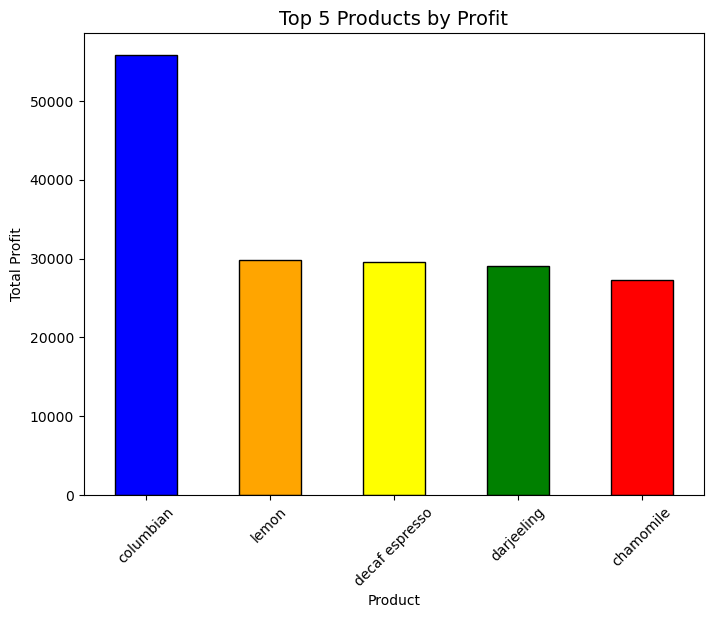

In [29]:
top_5_products_profit = df.groupby("Product")["Profit"].sum().sort_values(ascending = False).head(5)
print("Top 5 products with highest total profit :/n")
print(top_5_products_profit)
plt.figure(figsize = (8, 6))
colors = ["blue" , "orange", "yellow" , "green" , "red"]
top_5_products_profit.plot(kind = 'bar', color = colors , edgecolor = 'black')
plt.title("Top 5 Products by Profit" , fontsize = 14)
plt.xlabel("Product")
plt.ylabel("Total Profit")

plt.xticks(rotation = 45)
plt.show()

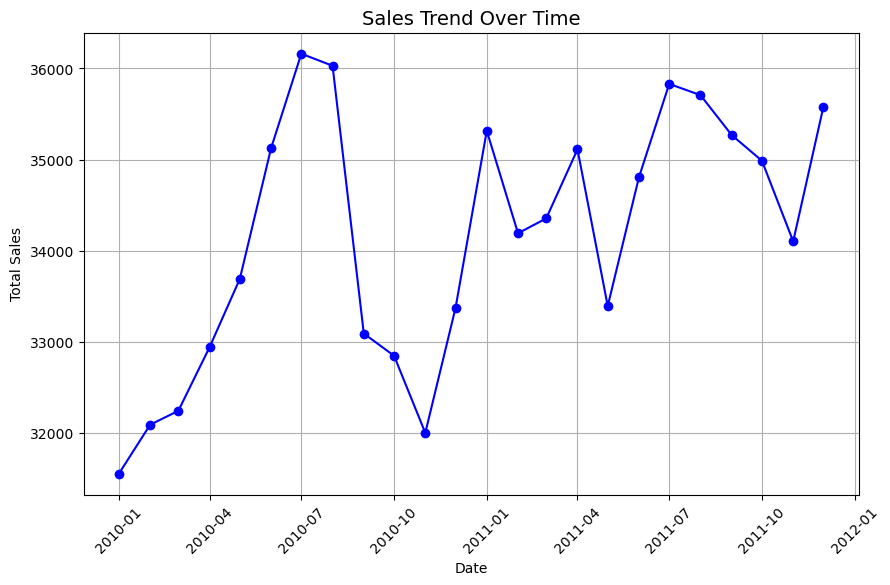

In [30]:
sales_trend = df.groupby("Date")["Sales"].sum()
plt.figure(figsize = (10,6))
plt.plot(sales_trend.index, sales_trend.values, marker = "o", linestyle = '-' , color = "blue")
plt.title("Sales Trend Over Time" , fontsize = 14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

Total sales for each market : /n
Market
west       272264.0
central    265045.0
east       178576.0
south      103926.0
Name: Sales, dtype: float64


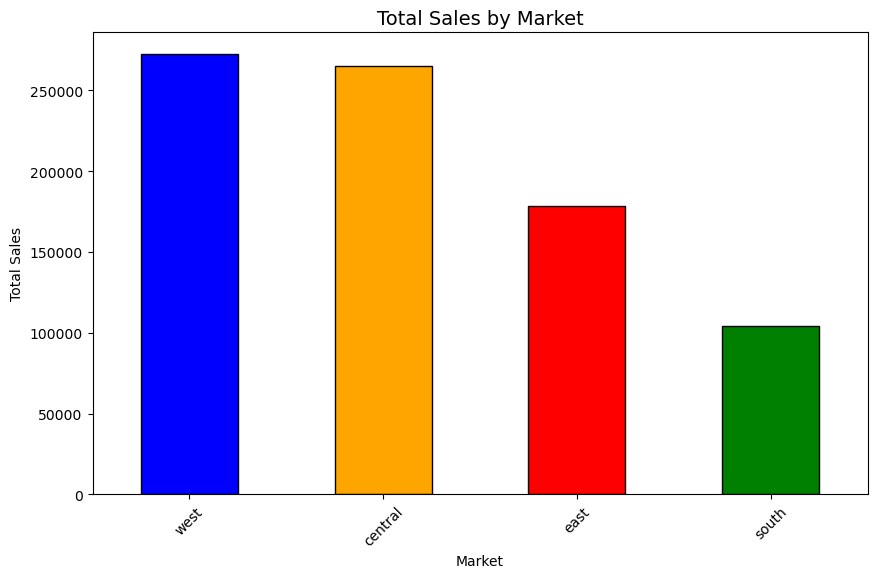

In [31]:
market_sales = df.groupby ("Market")["Sales"].sum().sort_values(ascending = False)
print("Total sales for each market : /n")
print(market_sales)
plt.figure(figsize = (10,6))
colors = ["blue", "orange", "red" , "green"]
market_sales.plot(kind = "bar" , color = colors , edgecolor = "black")

plt.title("Total Sales by Market" , fontsize = 14)
plt.xlabel("Market")
plt.ylabel("Total Sales")
plt.xticks(rotation = 45)
plt.show()

<Figure size 1000x600 with 0 Axes>

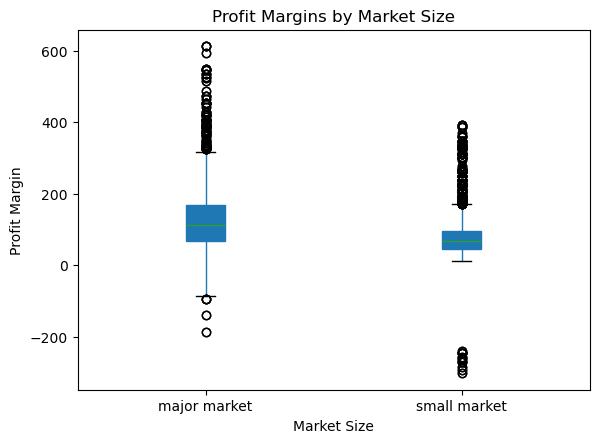

In [32]:
plt.figure(figsize = (10,6))
df.boxplot(column = "Margin" , by = "Market Size" , grid = False ,patch_artist = True )
plt.title("Profit Margins by Market Size")
plt.suptitle("")
plt.xlabel("Market Size")
plt.ylabel("Profit Margin")
plt.show()

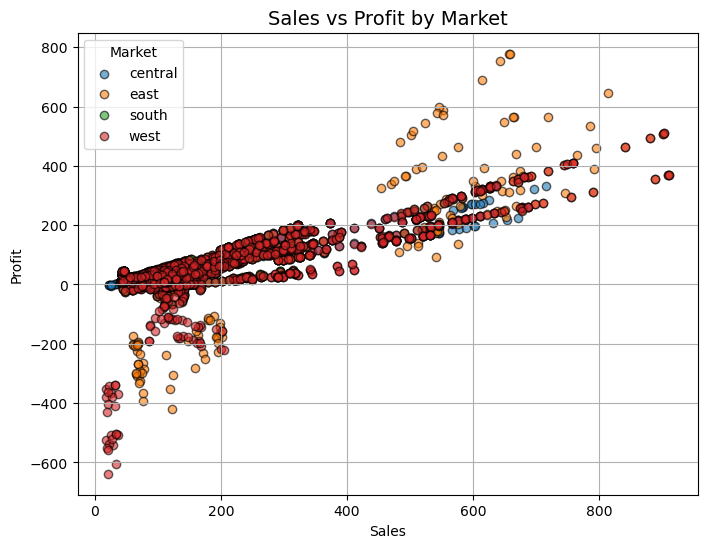

In [33]:
plt.figure(figsize=(8,6))


for market, data in df.groupby("Market"):
    plt.scatter(data["Sales"], data["Profit"], label=market, alpha=0.6, edgecolors="black")

plt.title("Sales vs Profit by Market", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Market")
plt.grid(True)
plt.show()

In [34]:
df["Month"] = df["Date"].dt.month_name()


avg_sales_by_month = df.groupby("Month")["Sales"].mean().sort_values(ascending=False)


print("Average Sales by Month:\n")
print(avg_sales_by_month)


top_month = avg_sales_by_month.head(1)
print("\n Month with highest average sales:")
print(top_month)

Average Sales by Month:

Month
July         203.364407
August       202.644068
June         197.548023
December     194.782486
September    193.110169
April        192.245763
October      191.627119
May          189.508475
January      188.901130
March        188.135593
February     187.242938
November     186.740113
Name: Sales, dtype: float64

 Month with highest average sales:
Month
July    203.364407
Name: Sales, dtype: float64


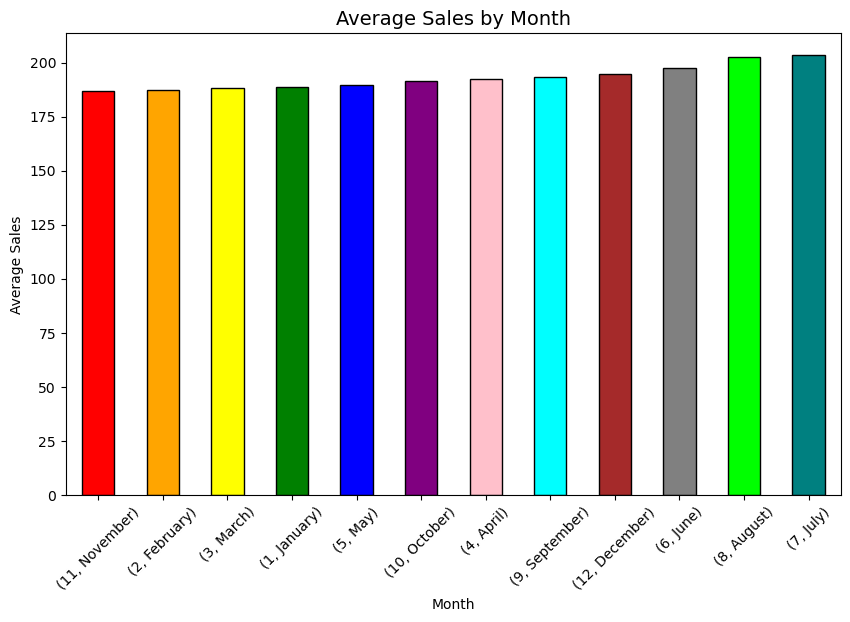

In [35]:
df["Month"] = df["Date"].dt.month_name()
df["Month_Num"] = df["Date"].dt.month


avg_sales_by_month = df.groupby(["Month_Num", "Month"])["Sales"].mean().sort_values(ascending=True)
colors = ["red", "orange", "yellow", "green", "blue", "purple",
          "pink", "cyan", "brown", "gray", "lime", "teal"]

plt.figure(figsize=(10,6))
avg_sales_by_month.plot(kind="bar", color= colors, edgecolor="black")

plt.title("Average Sales by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()

Correlation Matrix:

                Area Code    Profit    Margin     Sales      COGS  \
Area Code        1.000000  0.013979  0.029278  0.055220  0.080471   
Profit           0.013979  1.000000  0.920604  0.797331  0.464838   
Margin           0.029278  0.920604  1.000000  0.938809  0.678797   
Sales            0.055220  0.797331  0.938809  1.000000  0.886651   
COGS             0.080471  0.464838  0.678797  0.886651  1.000000   
Total Expenses   0.044552  0.199976  0.521254  0.689350  0.782534   
Marketing        0.051232  0.225465  0.531947  0.710515  0.818271   
Inventory        0.067998 -0.091545  0.061259  0.325934  0.621086   
Budget Profit    0.011994  0.937606  0.922812  0.815435  0.514967   
Budget COGS      0.063720  0.479862  0.680549  0.862882  0.947762   
Budget Margin    0.022871  0.876844  0.963460  0.920757  0.688587   
Budget Sales     0.042572  0.758830  0.901981  0.956538  0.849901   
ProductId        0.024297 -0.058693 -0.079595 -0.048077  0.002142   
Month_Num    

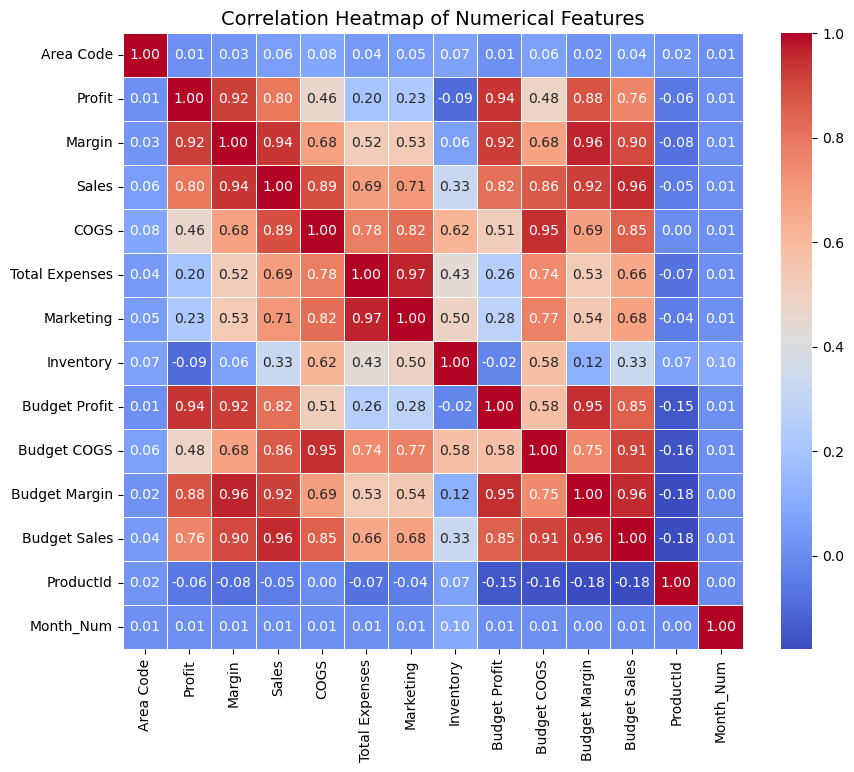

In [36]:
num_df = df.select_dtypes(include=['number'])


corr_matrix = num_df.corr()


print("Correlation Matrix:\n")
print(corr_matrix)


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

Profit-to-Sales Ratio by Product Type:

               Profit     Sales  Profit_to_Sales_Ratio
Product Type                                          
coffee        74683.0  216828.0               0.344434
espresso      68620.0  222996.0               0.307719
herbal tea    63254.0  207214.0               0.305259
tea           52986.0  172773.0               0.306680


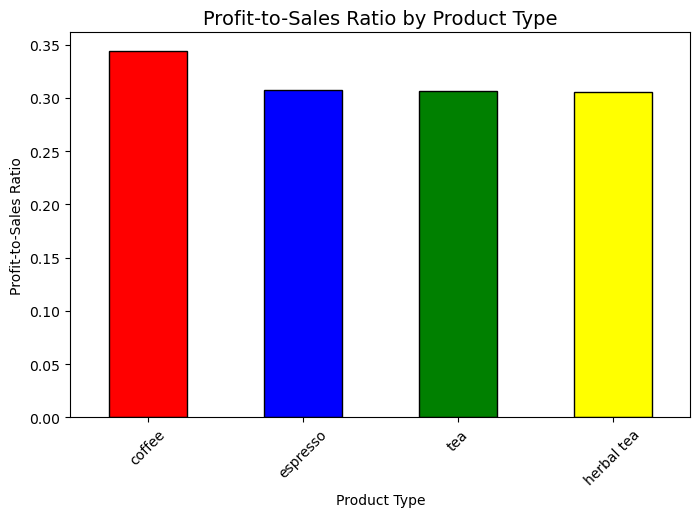

In [37]:
product_type_summary = df.groupby("Product Type").agg({
    "Profit": "sum",
    "Sales": "sum"
})


product_type_summary["Profit_to_Sales_Ratio"] = product_type_summary["Profit"] / product_type_summary["Sales"]


print("Profit-to-Sales Ratio by Product Type:\n")
print(product_type_summary)

colors = ["red" , "blue" , "green" , "yellow"]
plt.figure(figsize=(8,5))
product_type_summary["Profit_to_Sales_Ratio"].sort_values(ascending=False).plot(
    kind="bar", color= colors, edgecolor="black"
)

plt.title("Profit-to-Sales Ratio by Product Type", fontsize=14)
plt.xlabel("Product Type")
plt.ylabel("Profit-to-Sales Ratio")
plt.xticks(rotation=45)
plt.show()